In [1]:
%matplotlib inline

import datetime as dt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import statsmodels.api as sm

pd.set_option('max_rows', 20)
# pd.set_option('max_rows', 1000)

# Data

## Regressors

In [2]:
data = pd.read_excel('Data.xlsx',None,dayFirst=True)

data = list(data.values())

dat=pd.DataFrame()

# del data[6]


for df in data:
    df.set_index("Date", inplace=True)
#     df.drop_duplicates(inplace=True)

In [3]:
data = pd.concat(data,axis=1)
data.sort_index(inplace=True)

### Transformations


In [4]:
data.columns

Index(['NewResidentialSales', 'Exports', 'DisposableIncome', 'Imports',
       'JoblessClaims', 'ProducerPriceIndex', 'UnemploymentRate',
       'GeneralBusinessConditions', 'ConsumerPriceIndex', 'EmploymentRate',
       'ConsumerConfidence', 'IndustrialProductionIndex', 'RetailFoodSales'],
      dtype='object')

In [5]:
data["IndustrialProductionIndex"] = np.log(data["IndustrialProductionIndex"]) - np.log(data["IndustrialProductionIndex"].shift(1))
data["ConsumerConfidence"] = np.log(data["ConsumerConfidence"]) - np.log(data["ConsumerConfidence"].shift(1))
data["Imports"] = np.log(data["Imports"]) - np.log(data["Imports"].shift(1))
data["Exports"] = np.log(data["Exports"]) - np.log(data["Exports"].shift(1))
data["ProducerPriceIndex"] = np.log(data["ProducerPriceIndex"]) - np.log(data["ProducerPriceIndex"].shift(1))
data["JoblessClaims"] = np.log(data["JoblessClaims"]) - np.log(data["JoblessClaims"].shift(1))
data["RetailFoodSales"] = np.log(data["RetailFoodSales"]) - np.log(data["RetailFoodSales"].shift(1))
data["NewResidentialSales"] = np.log(data["NewResidentialSales"]) - np.log(data["NewResidentialSales"].shift(1))
data["UnemploymentRate"] = data["UnemploymentRate"] - data["UnemploymentRate"].shift(1)
data["EmploymentRate"] = data["EmploymentRate"] - data["EmploymentRate"].shift(1)
data["DisposableIncome"] = np.log(data["DisposableIncome"]) - np.log(data["DisposableIncome"].shift(1))
data["GeneralBusinessConditions"] = np.log(data["GeneralBusinessConditions"]) - np.log(data["GeneralBusinessConditions"].shift(1))
data["ConsumerPriceIndex"] = data["ConsumerPriceIndex"]

# data["ConsumerPriceIndex"].loc[dt.datetime(2009,1,1):].plot()

### Stationarity

In [6]:
for series in data.columns:
    d = data[series]    
    pv = sm.tsa.stattools.adfuller(d[d.notnull()])[1]
    if pv > 0.05:
        print(series + " 's p-value is: " + str(pv))

NewResidentialSales 's p-value is: 0.988370553646
JoblessClaims 's p-value is: 0.24770534847
EmploymentRate 's p-value is: 0.345649514846
RetailFoodSales 's p-value is: 0.627133470279


## Response Variable

In [7]:
gdp = pd.read_excel('GDP.xlsx',dayFirst=True)
gdp.set_index("Date", inplace=True)
gdp["GDP"] = np.log(gdp["GDP"]) - np.log(gdp["GDP"].shift(1))

# Balanced Panel

In [8]:
balancedIndex = ~data.isnull().any(axis=1)
data[balancedIndex]

,NewResidentialSales,Exports,DisposableIncome,Imports,JoblessClaims,ProducerPriceIndex,UnemploymentRate,GeneralBusinessConditions,ConsumerPriceIndex,EmploymentRate,ConsumerConfidence,IndustrialProductionIndex,RetailFoodSales
Date,,,,,,,,,,,,,
2010-01-31,0.013766,-0.246317,0.008873,-0.067987,-0.188285,0.014889,-0.001,0.020834,0.75,-0.004,0.016840,-0.069069,-0.236325
2010-02-28,0.035409,0.075958,0.004470,0.027679,0.069042,0.012143,0.004,0.051153,0.78,-0.002,-0.067030,-0.001136,-0.048187
2010-03-31,0.046870,0.254201,-0.018580,0.242947,0.165317,-0.001559,0.009,0.029827,0.52,-0.002,0.035091,0.180426,0.231714
2010-04-30,0.030556,-0.036670,0.007699,-0.081357,-0.136788,0.003989,0.002,0.002590,0.57,0.003,0.003038,-0.083052,-0.160867
2010-05-31,0.036153,0.154966,0.004203,0.026540,0.029296,0.004650,0.000,-0.007789,0.43,-0.001,0.023977,0.039419,0.055060
2010-06-30,0.032330,-0.034984,0.009207,0.039556,0.010577,0.001063,-0.004,0.000868,0.00,0.004,0.015671,-0.031205,-0.011223
2010-07-31,0.040110,0.033311,0.024352,0.096491,0.015757,0.000869,-0.003,0.001735,0.01,0.001,-0.007805,0.045962,0.043077
2010-08-31,0.038008,0.084763,0.027146,0.031145,0.006069,0.007304,-0.003,0.002596,0.04,0.002,0.034652,0.043942,0.039221
2010-09-30,0.034327,-0.021197,0.020778,0.052935,0.000323,0.005824,-0.008,0.007749,0.45,0.005,0.013158,0.000000,-0.019948


In [9]:
n_components=5
pca = PCA(n_components=n_components)
components = pca.fit_transform(data[balancedIndex])
components = pd.DataFrame(components)
components.set_index(data[balancedIndex].index, inplace=True)

print(pca.explained_variance_ratio_) 

[ 0.6241585   0.22421535  0.08139473  0.02986808  0.01642318]


In [10]:
sum(pca.explained_variance_ratio_)

0.97605984190422523

## OLS

first I need to match the estimated components to the available GDPs

We won't use a constant since we expect at least one of the factors to have little variance

In [11]:
olsSample = gdp.join(components, how="inner")
gdpComp = olsSample[list(range(0,n_components))]

In [12]:
# X = sm.add_constant(gdpComp)
X = gdpComp
model = sm.OLS(olsSample["GDP"],X)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     12.54
Date:                Tue, 29 Nov 2016   Prob (F-statistic):           1.78e-05
Time:                        16:08:42   Log-Likelihood:                 60.826
No. Observations:                  24   AIC:                            -111.7
Df Residuals:                      19   BIC:                            -105.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0505      0.019      2.632      0.0

In [13]:
results.params

0    0.050517
1    0.022236
2    0.177091
3   -0.069884
4    0.299148
dtype: float64

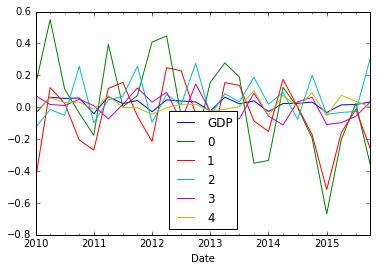

In [14]:
olsSample.plot()

In [15]:
model = sm.tsa.ARMA(olsSample["GDP"],order=(1,0,0))
results = model.fit()
results.params
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                  49.239
Method:                       css-mle   S.D. of innovations              0.031
Date:                Tue, 29 Nov 2016   AIC                            -92.477
Time:                        16:08:43   BIC                            -88.943
Sample:                    03-31-2010   HQIC                           -91.540
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0218      0.005      4.767      0.000         0.013     0.031
ar.L1.GDP     -0.4019      0.196     -2.053      0.052        -0.786    -0.018
                                    Roots           